In [1]:
import numpy as np
import numpy.matlib
from scipy.io import loadmat
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import Sk

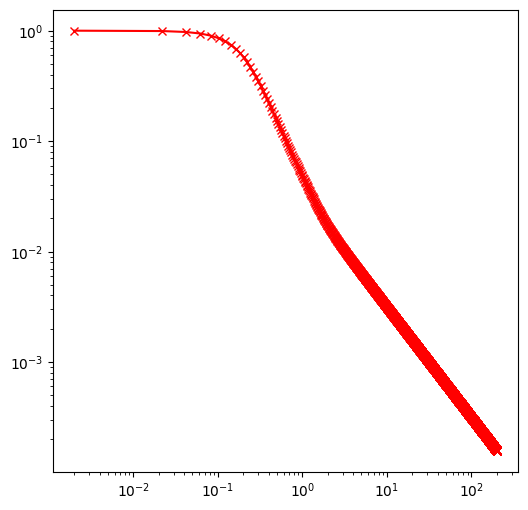

In [2]:
# qq = (np.logspace(-6,0,120))
qq = (np.linspace(0.002,200,10000))

q = qq
L = 100
b = L/50
S_q = Sk.Sk(q,L,b)
# S_q_rod = Sk.S_rod(q,L)

plt.close('all')
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(qq,S_q,'-xr')
# ax.plot(qq,S_q_rod,'-k')
# ax.plot(qq[qq*b>3.1],S_q_th[qq*b>3.1])

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

In [3]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

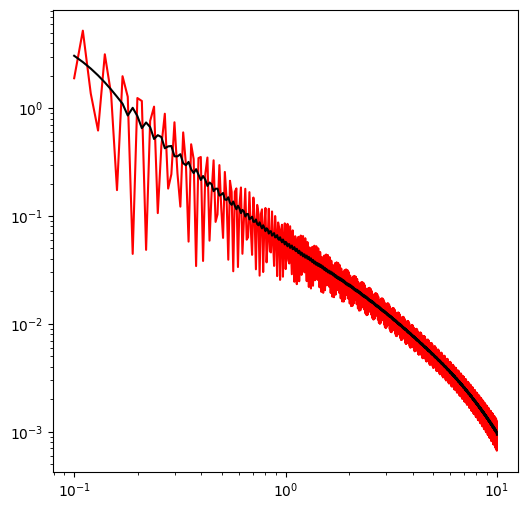

In [4]:
# Fourier transform
rr = np.linspace(0.1,10,1000)
gamma_r = [np.trapz(S_q*qq**2*np.sin(qq*r)/qq/r, qq) for r in rr] 
gamma_r_sm = savgol_filter(gamma_r, 15,2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(rr,gamma_r,'-r')
ax.plot(rr,gamma_r_sm,'-k')

ax.set_xscale('log')
ax.set_yscale('log')

plt.show()

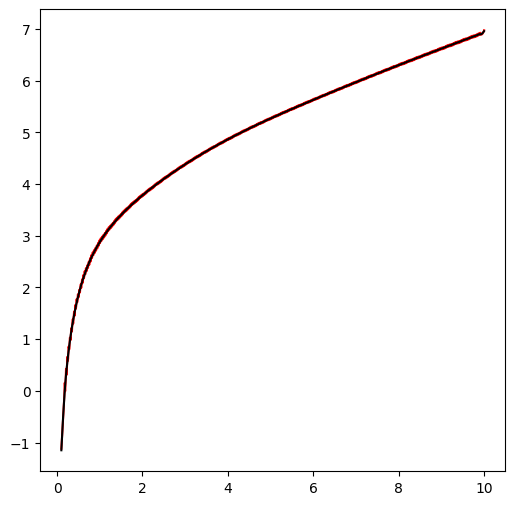

In [5]:
# PMF
w_r = -np.log(gamma_r_sm)
w_r_sm = savgol_filter(w_r, 15,2)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.plot(rr,w_r,'-r')
ax.plot(rr,w_r_sm,'-k')

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.show()